In [112]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import urllib.request
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns 
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [113]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data" # I get data from uci website

raw_data = urllib.request.urlopen(url) 

dataset = np.loadtxt(raw_data, delimiter = ',') # load the dataset

In [114]:
print(dataset[0]) # printing first row. we have 58 columns

[  0.      0.64    0.64    0.      0.32    0.      0.      0.      0.
   0.      0.      0.64    0.      0.      0.      0.32    0.      1.29
   1.93    0.      0.96    0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.778   0.      0.
   3.756  61.    278.      1.   ]


In [115]:
#according to the documentation of dataset first 48 rows are continuos real [0, 100] attributes of type word_freq_WORD 
# so we only use first 48 columns amongs all rows 
# this 48 rows are the features 
features = dataset[: , 0:48]

In [116]:
# according to the documentation, the last column is for the label so selecting the last column as target/label
labels = dataset[:, -1]

**Split data into training set and test set**

In [117]:
features_train1, features_test1, labels_train1, labels_test1 = train_test_split(features, labels, test_size= 0.40, random_state = 17) #40% test data and %60 will be training data

In [118]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size= 0.10, random_state = 17) #10% test data and %90 will be train data

# 1. **Multinomial Naive Bayes Classifier**

In [119]:
# Firstly, I trained the model with training set by split size 0.60
mlnNB = MultinomialNB()
mlnNB.fit(features_train1, labels_train1) # model trained by %60 trainin set 
pred_on_test_data_mlnb_1 = mlnNB.predict(features_test1)   # Model predict test data features labels 
mlnNB.fit(features_train, labels_train) # model trained by %90 train set
pred_on_test_data_mlnb = mlnNB.predict(features_test)   # Model predict test data features labels 


**Results of Multinomial Naive Bayes Classifier**

In [120]:
score =  accuracy_score(pred_on_test_data_mlnb_1, labels_test1)  # expected : labels_test (test data labels), predicted :pred_on_test_data
print ("Accuracry Score of Multinomial Naive Bayes Classifier(split size %60): ", score ,"%")  # Check accuracy score

score =  accuracy_score(pred_on_test_data_mlnb, labels_test)  # expected : labels_test (test data labels), predicted :pred_on_test_data
print ("Accuracry Score of Multinomial Naive Bayes Classifier(split size%90): ", score ,"%")  # Check accuracy score

Accuracry Score of Multinomial Naive Bayes Classifier(split size %60):  0.8750678978815861 %
Accuracry Score of Multinomial Naive Bayes Classifier(split size%90):  0.89587852494577 %


I achieved a better result from the split where the training set rate was higher. For this reason, I continued my study with a %90 division of training set rate.

In [121]:
print("Classification Report of Multinomial Naive Bayes Classifier:\n", classification_report(labels_test, pred_on_test_data_mlnb, labels = [1, 0]))

Classification Report of Multinomial Naive Bayes Classifier:
               precision    recall  f1-score   support

           1       0.82      0.97      0.89       198
           0       0.98      0.84      0.90       263

    accuracy                           0.90       461
   macro avg       0.90      0.91      0.90       461
weighted avg       0.91      0.90      0.90       461



In [122]:
# Confusion Matrix of Multinomial Naive Bayes Classifier
cm = confusion_matrix(labels_test, pred_on_test_data_mlnb, labels = [1, 0])
print("Confusion Matrix of Naive Bayes Classifier: \n", cm)

Confusion Matrix of Naive Bayes Classifier: 
 [[193   5]
 [ 43 220]]


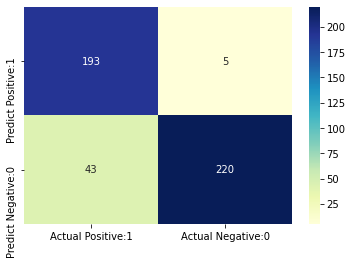

In [123]:
# Visualization of confusion matrix.
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot= True, fmt= 'd', cmap = 'YlGnBu')


# 2. **Gaussian Naive Bayes Classifier**

In [124]:
gNB = GaussianNB()
gNB.fit(features_train, labels_train)
pred_from_test_data_gnb = gNB.predict(features_test)

**Results of Gaussian Naive Bayes Classifier**

In [125]:
score = accuracy_score(pred_from_test_data_gnb, labels_test)
print ("Accuracy score of Gaussian Naive Bayes Classifier : ", score, "%") # Accuracy Score of Gaussian Naive Bayes Classifier

Accuracy score of Gaussian Naive Bayes Classifier :  0.8459869848156182 %


In [126]:
# Classification Report of Gaussian Naive Bayes Classifier
print("Classification Report of Gaussian Naive Bayes Classifier:\n", classification_report(labels_test, pred_from_test_data_gnb, labels = [1, 0]))

Classification Report of Gaussian Naive Bayes Classifier:
               precision    recall  f1-score   support

           1       0.74      0.98      0.85       198
           0       0.98      0.74      0.85       263

    accuracy                           0.85       461
   macro avg       0.86      0.86      0.85       461
weighted avg       0.88      0.85      0.85       461



In [127]:
# Confusion Matrix of Gaussian Naive Bayes Classifier
cm = confusion_matrix(labels_test, pred_from_test_data_gnb, labels = [1, 0])
print("Confusion Matrix of Gaussian Naive Bayes Classifier: \n", cm)

Confusion Matrix of Gaussian Naive Bayes Classifier: 
 [[195   3]
 [ 68 195]]


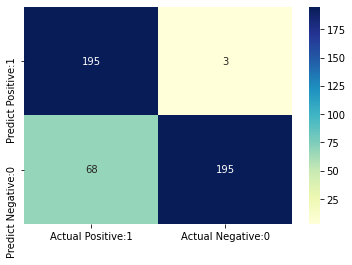

In [128]:
# Visualization of confusion matrix.
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot= True, fmt= 'd', cmap = 'YlGnBu')


# 3. **Bernoulli Naive Bayes Classifier**

In [129]:
bnlNB = BernoulliNB() 
bnlNB.fit(features_train, labels_train)
pred_from_test_data_bnlnb = bnlNB.predict(features_test)

**Results of Bernoulli Naive Bayes Classifier**

In [130]:
score = accuracy_score(pred_from_test_data_bnlnb, labels_test)
print ("Accuracy score of Bernoulli Naive Bayes Classifier : ", score, "%")

Accuracy score of Bernoulli Naive Bayes Classifier :  0.911062906724512 %


In [131]:
# Classification Report of Bernoulli Naive Bayes Classifier
print("Classification Report of Bernoulli Naive Bayes Classifier:\n", classification_report(labels_test, pred_from_test_data_bnlnb, labels = [1, 0]))

Classification Report of Bernoulli Naive Bayes Classifier:
               precision    recall  f1-score   support

           1       0.92      0.87      0.89       198
           0       0.91      0.94      0.92       263

    accuracy                           0.91       461
   macro avg       0.91      0.91      0.91       461
weighted avg       0.91      0.91      0.91       461



In [132]:
# Confusion Matrix of Bernoulli Naive Bayes Classifier
cm = confusion_matrix(labels_test, pred_from_test_data_bnlnb, labels = [1, 0])
print("Confusion Matrix of Bernoulli Naive Bayes Classifier: \n", cm)

Confusion Matrix of Bernoulli Naive Bayes Classifier: 
 [[172  26]
 [ 15 248]]


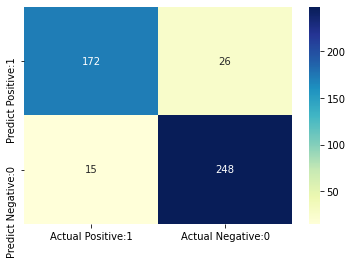

In [133]:
# Visualization of confusion matrix.
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot= True, fmt= 'd', cmap = 'YlGnBu')